Objective: The data is related to Chevrolet cars. The regression goal is to predict the price(MSRP)(variable y) of different Chevrolet models based on a number of car features.

Data source : https://www.kaggle.com/jshih7/car-price-prediction/data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
car = pd.read_csv("car_data.csv")

In [3]:
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,Chevrolet,Astro Cargo,2003,regular unleaded,190.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Large,Cargo Minivan,21.0,15.0,1385.0,22050
1,Chevrolet,Astro Cargo,2003,regular unleaded,190.0,6.0,AUTOMATIC,all wheel drive,3.0,NaN,Large,Cargo Minivan,18.0,14.0,1385.0,24450
2,Chevrolet,Astro Cargo,2004,regular unleaded,190.0,6.0,AUTOMATIC,all wheel drive,3.0,NaN,Large,Cargo Minivan,18.0,14.0,1385.0,25195
3,Chevrolet,Astro Cargo,2004,regular unleaded,190.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Large,Cargo Minivan,19.0,14.0,1385.0,22695
4,Chevrolet,Astro Cargo,2005,regular unleaded,190.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Large,Cargo Minivan,20.0,15.0,1385.0,22930


In [4]:
car.shape

(1123, 16)

In [5]:
# Finding the null values in the data set
car.isnull().sum()

Make                 148
Model                  0
Year                   0
Engine Fuel Type       0
Engine HP             26
Engine Cylinders      25
Transmission Type      0
Driven_Wheels          0
Number of Doors       11
Market Category      501
Vehicle Size           0
Vehicle Style          0
highway MPG           29
city mpg              35
Popularity           314
MSRP                   0
dtype: int64

In [6]:
car.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,1123.000000,1097.000000,1098.000000,1112.000000,1094.000000,1088.000000,809.0,1123.000000
mean,2010.087266,248.202370,5.915301,3.394784,25.763254,19.084559,1385.0,28350.385574
std,7.172775,107.464164,1.616664,0.882722,9.498672,10.494061,0.0,17289.812251
min,1990.000000,55.000000,0.000000,2.000000,15.000000,11.000000,1385.0,2000.000000
25%,2005.000000,165.000000,4.000000,2.000000,21.000000,15.000000,1385.0,18474.500000
50%,2015.000000,230.000000,6.000000,4.000000,23.000000,17.000000,1385.0,26430.000000
75%,2016.000000,295.000000,8.000000,4.000000,29.000000,20.000000,1385.0,36690.000000
max,2017.000000,650.000000,8.000000,4.000000,110.000000,128.000000,1385.0,92395.000000


In [7]:
car.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG          float64
city mpg             float64
Popularity           float64
MSRP                   int64
dtype: object

In [8]:
car.columns.values

array(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size',
       'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype=object)

Make                Car Brand (Categorical): Chevrolet
Model               Different Chevrolet Car Models (Categorical)
Year                The year in which the model was released (Numerical)
Engine Fuel Type    Car fuel types in our dataset (Categorical) ('regular unleaded', 'flex-fuel (unleaded/E85)', 'electric',
                    'premium unleaded (required)', 'premium unleaded (recommended)',
                    'diesel', 'flex-fuel (unleaded/natural gas))
Engine HP           This is the engine's horse power (Numerical)
Engine Cylinders    No. of cylinders in the engine (Numerical)
Transmission Type   Different transmission types (Categorical) - 'AUTOMATIC', 'MANUAL', 'DIRECT_DRIVE'
Driven_Wheels       Type of driven wheels (Categorical)
Number of Doors     (Numerical)
Market Category     Different Market categories (Categorical) - 'Crossover,Flex Fuel', 'Hatchback', 'Performance',
                    'Factory Tuner,High-Performance', 'High-Performance',
                    'Factory Tuner,Performance', 'Diesel', 'Crossover', 'Flex Fuel',
                    'Flex Fuel,Performance', 'Hybrid', 'Hatchback,Performance',
                    'Luxury,Hybrid'
Vehicle Size         Different vehicle sizes (Categorical) - 'Large', 'Compact', 'Midsize'
Vehicle Style        Different vehicle styles (Categorical) - Cargo Minivan', 'Passenger Minivan', 'Crew Cab Pickup',
                     '4dr Hatchback', 'Sedan', 'Coupe', '2dr SUV', '4dr SUV',
                     'Convertible', 'Wagon', 'Cargo Van', 'Regular Cab Pickup',
                     'Extended Cab Pickup', 'Passenger Van', '2dr Hatchback',
                     'Convertible SU
highway MPG          Highway Mileage (Numerical)
city mpg             City Mileage (Numerical)
Popularity           Market Popularity Code - (Numerical)
MSRP                 Manufacturer Suggested Retail Price of the different Chevrolet car models

In [9]:
car = car.rename(columns= {"Engine Fuel Type":"Engine_Fuel_Type",
                             "Engine HP": "Engine_HP",
                             "Engine Cylinders": "Engine_Cylinders",
                             "Transmission Type": "Transmission_Type",
                             "Number of Doors" : "Number_of_Doors",
                             "Market Category": "Market_Category",
                             "Vehicle Size": "Vehicle_Size",
                             "Vehicle Style": "Vehicle_Style",
                             "highway MPG" : "highway_MPG",
                             "city mpg" : "city_mpg"})

In [10]:
car.columns.values

array(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size',
       'Vehicle_Style', 'highway_MPG', 'city_mpg', 'Popularity', 'MSRP'],
      dtype=object)

In [11]:
car.Make.unique()

array(['Chevrolet', nan], dtype=object)

In [16]:
a =car.Model.unique()

In [17]:
a.count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [170]:
car.Engine_Fuel_Type.unique()

array(['regular unleaded', 'flex-fuel (unleaded/E85)', 'electric',
       'premium unleaded (required)', 'premium unleaded (recommended)',
       'diesel', 'flex-fuel (unleaded/natural gas)'], dtype=object)

In [171]:
car.Transmission_Type.unique()

array(['AUTOMATIC', 'MANUAL', 'DIRECT_DRIVE'], dtype=object)

In [172]:
car.Number_of_Doors.unique()

array([ 3.,  4.,  2., nan])

In [173]:
car.Market_Category.unique()

array([nan, 'Crossover,Flex Fuel', 'Hatchback', 'Performance',
       'Factory Tuner,High-Performance', 'High-Performance',
       'Factory Tuner,Performance', 'Diesel', 'Crossover', 'Flex Fuel',
       'Flex Fuel,Performance', 'Hybrid', 'Hatchback,Performance',
       'Luxury,Hybrid'], dtype=object)

In [174]:
car.Vehicle_Size.unique()

array(['Large', 'Compact', 'Midsize'], dtype=object)

In [175]:
car.Vehicle_Style.unique()

array(['Cargo Minivan', 'Passenger Minivan', 'Crew Cab Pickup',
       '4dr Hatchback', 'Sedan', 'Coupe', '2dr SUV', '4dr SUV',
       'Convertible', 'Wagon', 'Cargo Van', 'Regular Cab Pickup',
       'Extended Cab Pickup', 'Passenger Van', '2dr Hatchback',
       'Convertible SUV'], dtype=object)

# Data Visualization

Heat Map to find the correlation between the features

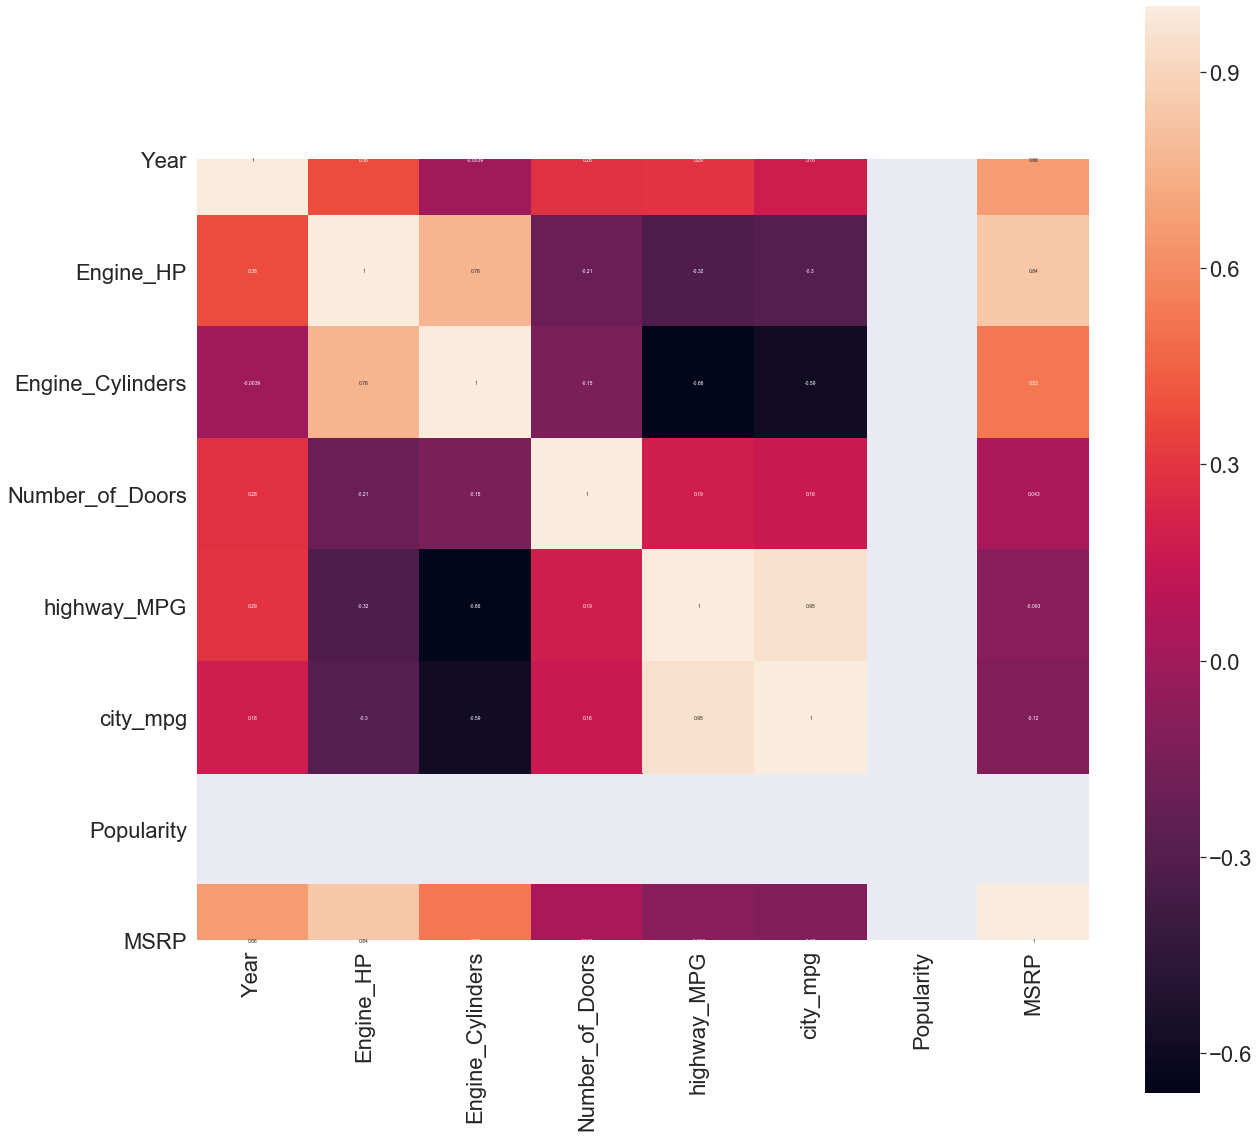

In [176]:
fig = plt.subplots(figsize = (20,20))
sns.set(font_scale=2.0)
sns.heatmap(car.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 5})
plt.show()

Dropping the Make and Popularity as they have same value for all the observations and are insignificant for model training

In [177]:
car = car.drop(['Make','Popularity'], axis = 1)

In [178]:
car.dtypes

Model                 object
Year                   int64
Engine_Fuel_Type      object
Engine_HP            float64
Engine_Cylinders     float64
Transmission_Type     object
Driven_Wheels         object
Number_of_Doors      float64
Market_Category       object
Vehicle_Size          object
Vehicle_Style         object
highway_MPG          float64
city_mpg             float64
MSRP                   int64
dtype: object

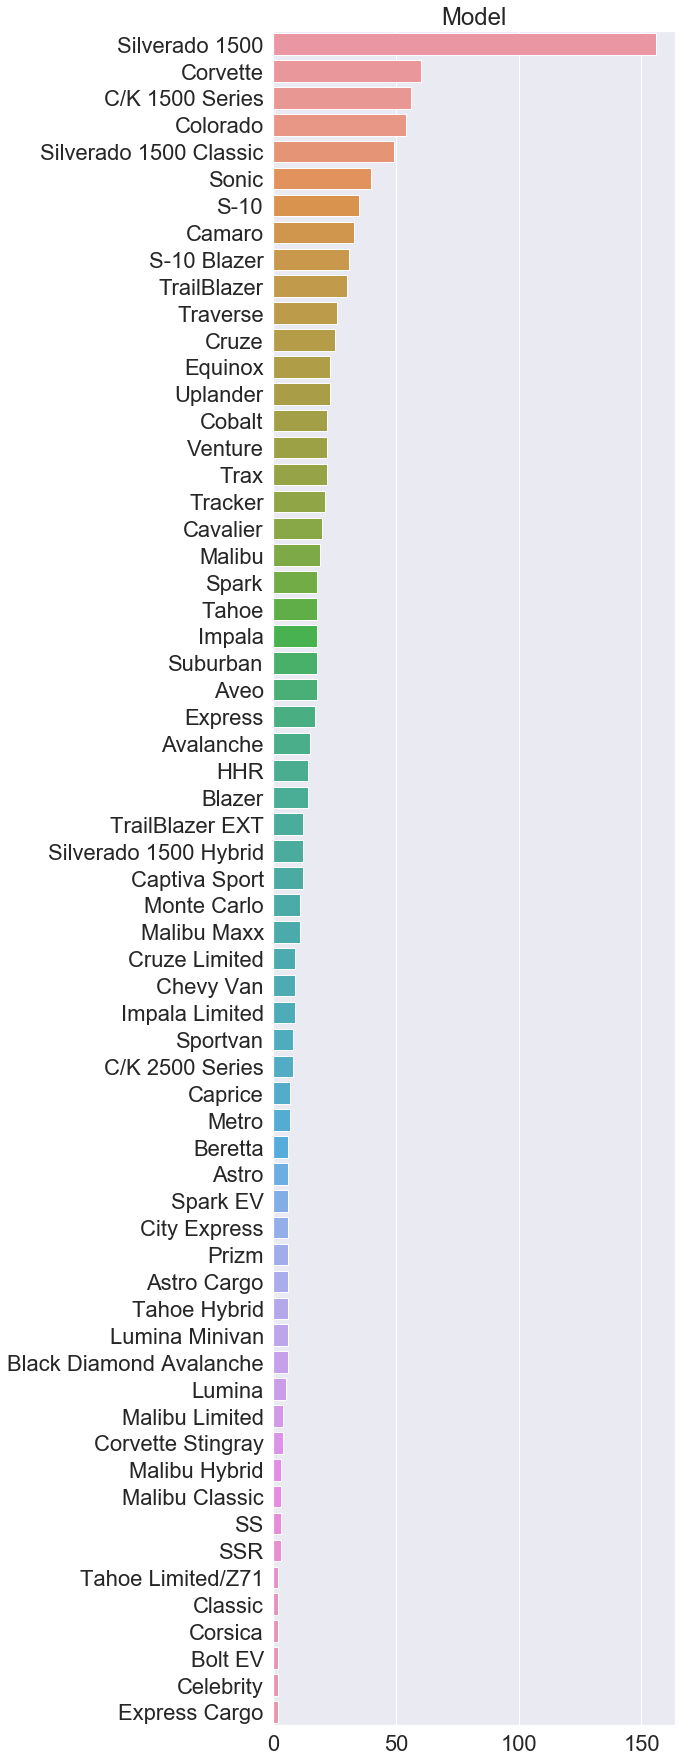

In [179]:
categorcial_variables = ['Model']
for col in categorcial_variables:
    plt.figure(figsize=(10,25))
    sns.barplot(car[col].value_counts().values, car[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

Label Encoding is done on the categorical variables

In [180]:
car.head()

,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,MSRP
0,Astro Cargo,2003,regular unleaded,190.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Large,Cargo Minivan,21.0,15.0,22050
1,Astro Cargo,2003,regular unleaded,190.0,6.0,AUTOMATIC,all wheel drive,3.0,NaN,Large,Cargo Minivan,18.0,14.0,24450
2,Astro Cargo,2004,regular unleaded,190.0,6.0,AUTOMATIC,all wheel drive,3.0,NaN,Large,Cargo Minivan,18.0,14.0,25195
3,Astro Cargo,2004,regular unleaded,190.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Large,Cargo Minivan,19.0,14.0,22695
4,Astro Cargo,2005,regular unleaded,190.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Large,Cargo Minivan,20.0,15.0,22930


# Data Preprocessing

Dealing with the missing values

In [181]:
car['Engine_HP'] = car['Engine_HP'].fillna((car['Engine_HP'].mean()))
car['Engine_Cylinders'] = car['Engine_Cylinders'].fillna((car['Engine_Cylinders'].mean()))
car['Number_of_Doors'] = car['Number_of_Doors'].fillna((car['Number_of_Doors'].mean()))
car['highway_MPG'] = car['highway_MPG'].fillna((car['highway_MPG'].mean()))
car['city_mpg'] = car['city_mpg'].fillna((car['city_mpg'].mean()))

In [182]:
car.isnull().sum()

Model                  0
Year                   0
Engine_Fuel_Type       0
Engine_HP              0
Engine_Cylinders       0
Transmission_Type      0
Driven_Wheels          0
Number_of_Doors        0
Market_Category      501
Vehicle_Size           0
Vehicle_Style          0
highway_MPG            0
city_mpg               0
MSRP                   0
dtype: int64

Found the mode of Market category and replaced nan with that

In [183]:
car.Market_Category.mode()

0    Flex Fuel
dtype: object

In [184]:
car['Market_Category'].fillna('Flex Fuel', inplace=True)

In [185]:
car.isnull().sum()

Model                0
Year                 0
Engine_Fuel_Type     0
Engine_HP            0
Engine_Cylinders     0
Transmission_Type    0
Driven_Wheels        0
Number_of_Doors      0
Market_Category      0
Vehicle_Size         0
Vehicle_Style        0
highway_MPG          0
city_mpg             0
MSRP                 0
dtype: int64

In [186]:
car.Market_Category.unique()

array(['Flex Fuel', 'Crossover,Flex Fuel', 'Hatchback', 'Performance',
       'Factory Tuner,High-Performance', 'High-Performance',
       'Factory Tuner,Performance', 'Diesel', 'Crossover',
       'Flex Fuel,Performance', 'Hybrid', 'Hatchback,Performance',
       'Luxury,Hybrid'], dtype=object)

In [187]:
car.isnull().sum()

Model                0
Year                 0
Engine_Fuel_Type     0
Engine_HP            0
Engine_Cylinders     0
Transmission_Type    0
Driven_Wheels        0
Number_of_Doors      0
Market_Category      0
Vehicle_Size         0
Vehicle_Style        0
highway_MPG          0
city_mpg             0
MSRP                 0
dtype: int64

Label Encoding is on categorical features 

In [188]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
car['Model'] = labelencoder_X.fit_transform(car['Model'])
car['Engine_Fuel_Type'] = labelencoder_X.fit_transform(car['Engine_Fuel_Type'])
car['Transmission_Type'] = labelencoder_X.fit_transform(car['Transmission_Type'])
car['Driven_Wheels'] = labelencoder_X.fit_transform(car['Driven_Wheels'])
car['Market_Category'] = labelencoder_X.fit_transform(car['Market_Category'])
car['Vehicle_Size'] = labelencoder_X.fit_transform(car['Vehicle_Size'])
car['Vehicle_Style'] = labelencoder_X.fit_transform(car['Vehicle_Style'])

In [189]:
car.head()

,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,MSRP
0,1,2003,6,190.0,6.0,0,3,3.0,5,1,4,21.0,15.0,22050
1,1,2003,6,190.0,6.0,0,0,3.0,5,1,4,18.0,14.0,24450
2,1,2004,6,190.0,6.0,0,0,3.0,5,1,4,18.0,14.0,25195
3,1,2004,6,190.0,6.0,0,3,3.0,5,1,4,19.0,14.0,22695
4,1,2005,6,190.0,6.0,0,3,3.0,5,1,4,20.0,15.0,22930


In [190]:
car.shape

(1123, 14)

# Splitting the dataset into training and testing sets

In [191]:
X = car.drop(['MSRP'], axis=1)
y = car.MSRP

Outlier Detection

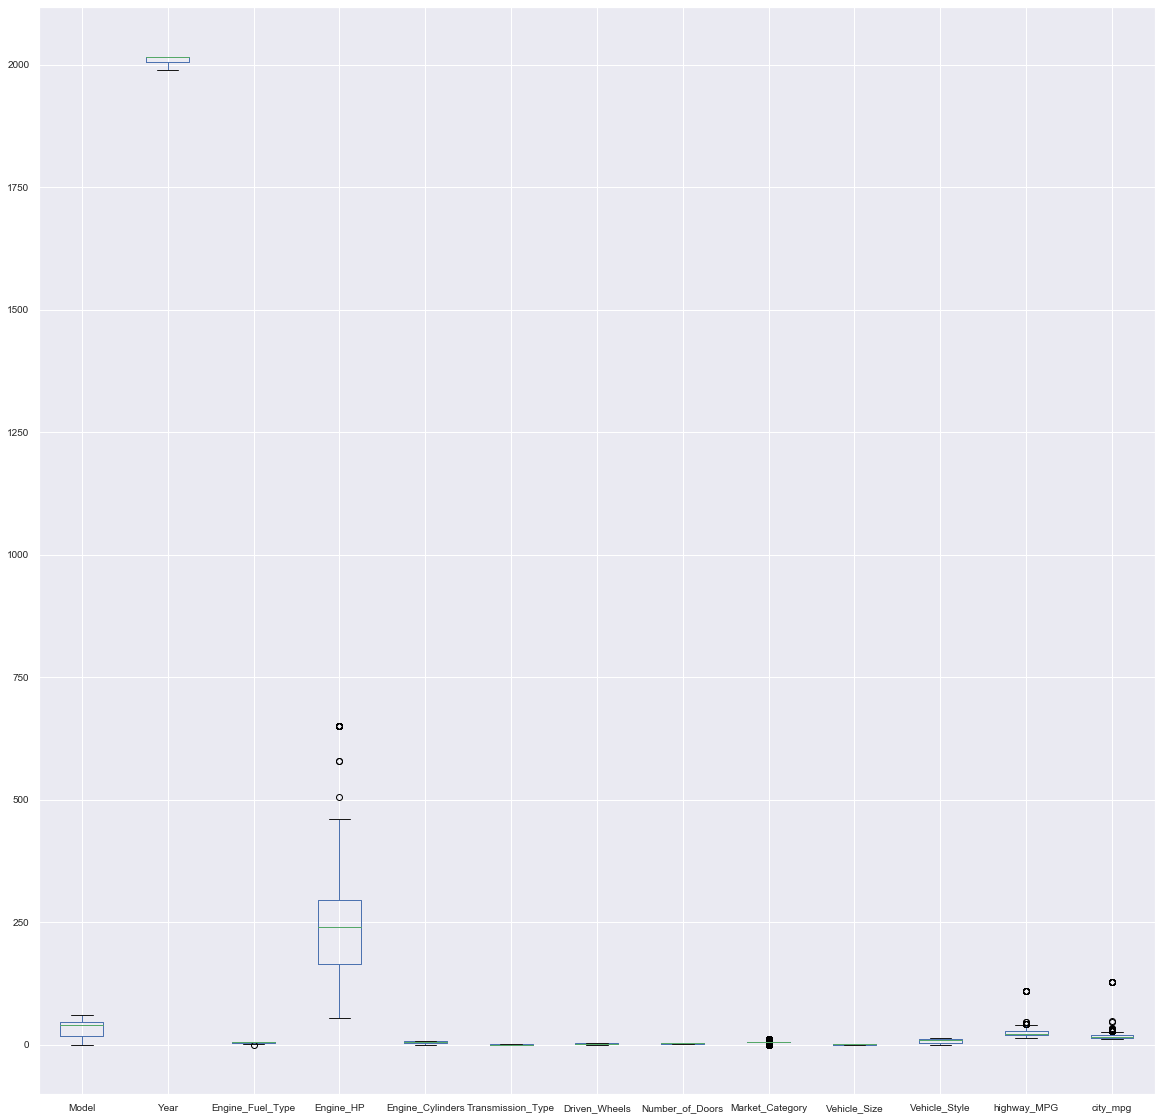

In [192]:
ax = X.plot(kind = 'box', figsize = (20,20), legend = True, fontsize = 10)
plt.show()

In [193]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state =0, test_size = 0.2)

Text(0.5, 1.0, 'Price Distribution')

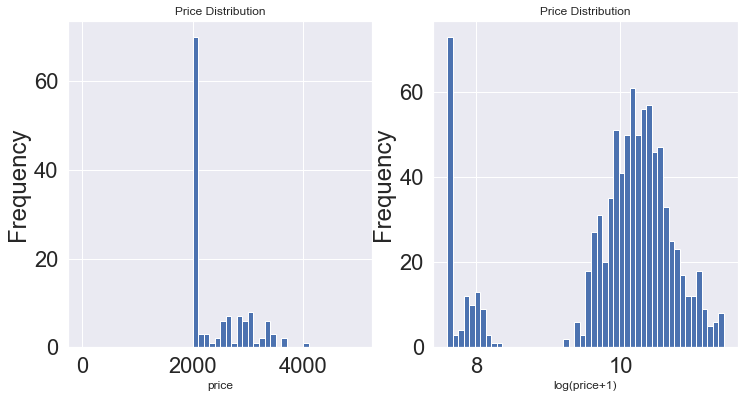

In [194]:
plt.subplot(1, 2, 1)
y_train.plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 5000])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)
plt.subplot(1, 2, 2)
np.log(y_train+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

# Scaling the train and test data

The features is spread over a wide range of values. So, for normalization purpose we decided to use MinMaxScaler.

In [195]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [196]:
X_train.shape

(898, 13)

In [197]:
X_test.shape

(225, 13)

# KNN Regression

Text(0, 0.5, 'MSE')

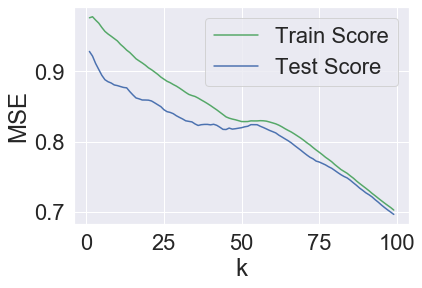

In [198]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,100):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,100)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

Using Grid Search

In [199]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

kfold =KFold(n_splits=5, random_state=0)

param_grid={'n_neighbors':range(1,10)}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train,y_train)

test=cross_val_score(grid_search, X_test, y_test, cv=kfold).mean()

In [200]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9389823821721689
Test 0.8064827471194385
parameters {'n_neighbors': 2}


In [201]:
# k = 2 is the best regressor
knn_reg = KNeighborsRegressor(9)
# Cross validation
scores = cross_val_score(knn_reg, X_train, y_train)
print("Cross-validation train_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

scores = cross_val_score(knn_reg, X_test, y_test)
print("Cross-validation test_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))
mn ="KNN Regression"

Cross-validation train_scores: [0.90640253 0.89653367 0.92324999]
Average cross-validation train_scores: 0.91
Cross-validation test_scores: [0.79232739 0.83658546 0.66318779]
Average cross-validation train_scores: 0.76


C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [202]:
model_results = pd.DataFrame(columns=('S.No','Model_Name','Parameters', 'Train_Score', 'Test_Score'))

In [203]:
model_results.loc[len(model_results)]=[1,'KNN Regression',grid_search.best_params_,grid_search.best_score_,test]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{'n_neighbors': 2},0.938982,0.806483


# Linear Regression

In [204]:
from sklearn.linear_model import LinearRegression, SGDRegressor

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score:', lreg.score(X_train, y_train))
linear_train = lreg.score(X_train, y_train)
print('Test score: ', lreg.score(X_test, y_test))
linear_test = lreg.score(X_test, y_test)
# Cross validation
scores = cross_val_score(lreg, X_train, y_train)
print("Cross-validation train_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

scores = cross_val_score(lreg, X_test, y_test)
print("Cross-validation test_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

Train score: 0.8784156201461062
Test score:  0.8615964616962237
Cross-validation train_scores: [0.89913692 0.8576135  0.86279383]
Average cross-validation train_scores: 0.87
Cross-validation test_scores: [0.86446694 0.86857464 0.85186775]
Average cross-validation train_scores: 0.86


C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


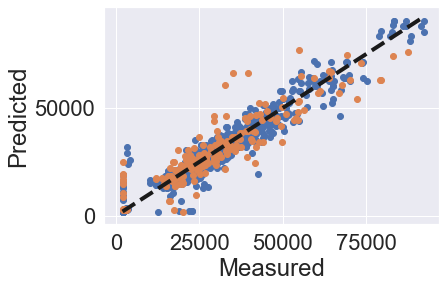

In [205]:
# INCLUDE IF NEEDED
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

In [206]:
model_results.loc[len(model_results)]=[2,'Linear Regression',' N/A',linear_train,linear_test]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{'n_neighbors': 2},0.938982,0.806483
1,2,Linear Regression,N/A,0.878416,0.861596


# Ridge

In [207]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

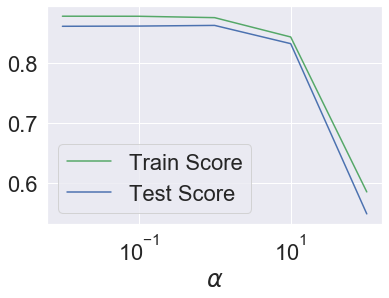

In [208]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [209]:
print(train_score_list)
print(test_score_list)

[0.8784143479746023, 0.8783291041015112, 0.8760279907029414, 0.8438373522577371, 0.5858964312612338]
[0.8616420829507255, 0.8619895401722875, 0.8631070051546904, 0.8327240584231084, 0.5493182627167966]


In [210]:
#as for every value of alpha the test and train scores are almost similar....Lets as choose alpha = 0.1 for CV
ridge = Ridge(0.1)

scores = cross_val_score(ridge, X_train, y_train)
print("Cross-validation train_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

scores = cross_val_score(ridge, X_test, y_test)
print("Cross-validation test_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

Cross-validation train_scores: [0.89936398 0.85742296 0.86244715]
Average cross-validation train_scores: 0.87
Cross-validation test_scores: [0.87076015 0.86834462 0.84654479]
Average cross-validation train_scores: 0.86


C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [211]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.87


In [212]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8760
Test score: 0.8631


In [213]:
ridge = Ridge(alpha = 100)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.5859
Test score: 0.5493


In [214]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))
test_score = '{:.4f}'.format(ridge.score(X_test, y_test))

Train score: 0.8784
Test score: 0.8616


alpha = 0.01 gives the best value

In [215]:
ridge.coef_

array([  4198.57803661,  19401.76242909,  -4564.87805454,  72598.67363466,
        -1878.97541214,  -1126.56798283,  -2212.81147135,   2628.72272103,
         3369.14486806,  -4527.82716398,  -4232.60941356,  20749.98911756,
       -19887.24855585])

In [216]:
ridge.intercept_

-5010.535074353338

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Unrecognized location 'upper'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


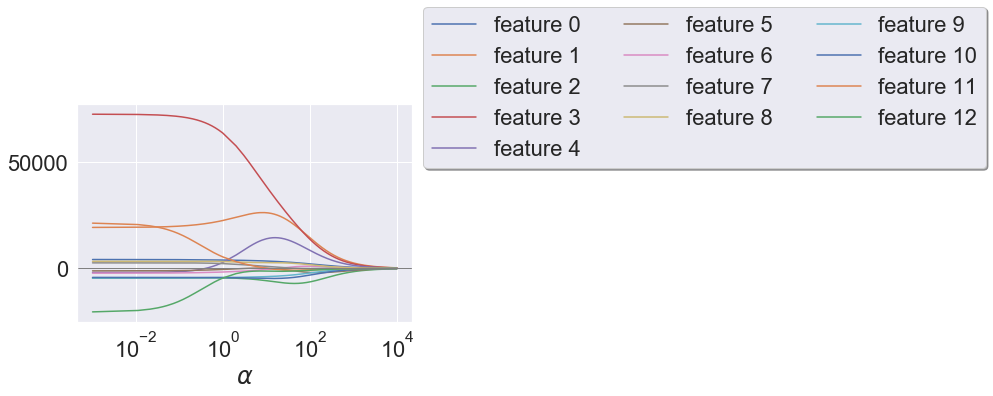

In [217]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper', bbox_to_anchor=(1, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [218]:
model_results.loc[len(model_results)]=[3,'Ridge Regression',grid_search.best_params_,grid_search.best_score_,test_score]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{'n_neighbors': 2},0.938982,0.806483
1,2,Linear Regression,N/A,0.878416,0.861596
2,3,Ridge Regression,{'alpha': 0.01},0.872944,0.8616


# Lasso

In [219]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10]
train_score_list = []
test_score_list = []

for alpha in x_range:
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)
    train_score_list.append(lasso.score(X_train, y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [220]:
train_score_list

[0.8784156180643702,
 0.8784154123902421,
 0.8783949283675038,
 0.8773123911219589]

In [221]:
test_score_list

[0.8615967343629689,
 0.8615990475779264,
 0.8616076987048057,
 0.8611653224425798]

Text(0.5, 0, '$\\alpha$')

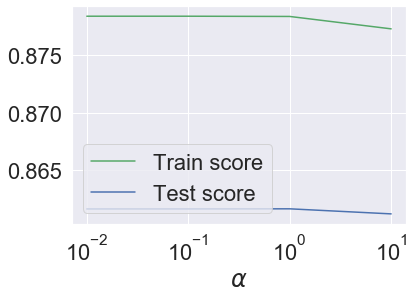

In [222]:
y_axis = range (0,1)
plt.plot(x_range, train_score_list, c = 'g', label = 'Train score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [223]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.87


In [224]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.8784
Test score: 0.8616


C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Unrecognized location 'upper'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


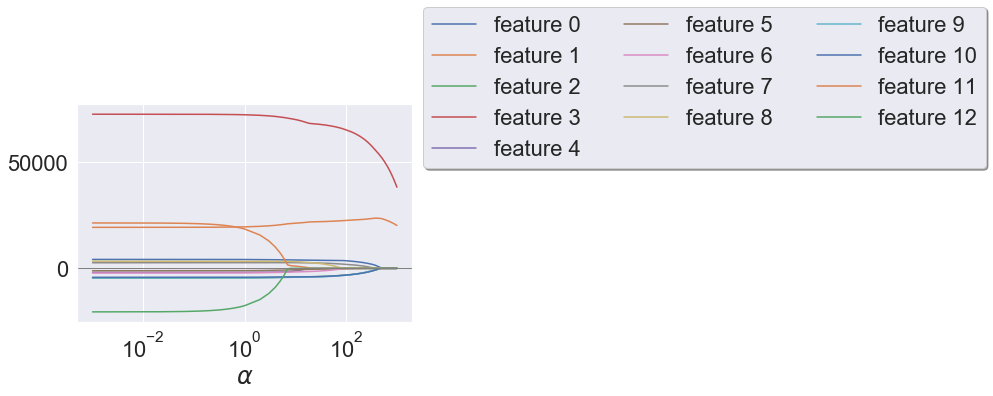

In [225]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper', bbox_to_anchor=(1, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [226]:
model_results.loc[len(model_results)]=[4,'Lasso Regression',grid_search.best_params_,grid_search.best_score_,test_score]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{'n_neighbors': 2},0.938982,0.806483
1,2,Linear Regression,N/A,0.878416,0.861596
2,3,Ridge Regression,{'alpha': 0.01},0.872944,0.8616
3,4,Lasso Regression,{'alpha': 0.001},0.872942,0.8616


# Polynomial regression

In [227]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [228]:
print(train_score_list)
print(test_score_list)

[0.8784156201461062, 0.9678538777222463, 0.9874956660090395, 0.9867948234093475]
[0.8615964616962233, 0.9201837973735152, -1.2403770027300912e+16, -3.9270022920132146e+20]


We get best scores with polynomial regression of order 2

In [229]:
print("Train Score",train_score_list[1])
print("Test Score",test_score_list[1])
print("Best Parameters n=",2)

Train Score 0.9678538777222463
Test Score 0.9201837973735152
Best Parameters n= 2


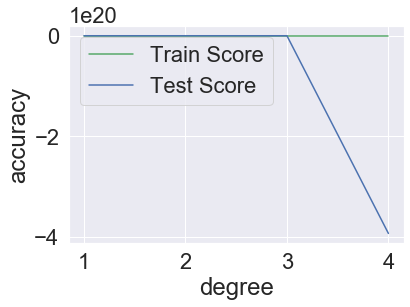

In [230]:
%matplotlib inline

x_axis = range(1,5)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


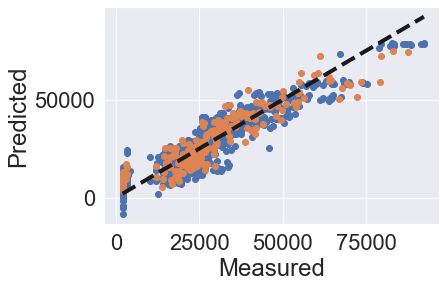

In [231]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted1 = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

In [232]:
model_results.loc[len(model_results)]=[5,'Polynomial Regression',"{'degree': 2}",train_score_list[1],test_score_list[1]]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{'n_neighbors': 2},0.938982,0.806483
1,2,Linear Regression,N/A,0.878416,0.861596
2,3,Ridge Regression,{'alpha': 0.01},0.872944,0.8616
3,4,Lasso Regression,{'alpha': 0.001},0.872942,0.8616
4,5,Polynomial Regression,{'degree': 2},0.967854,0.920184


# Linear SVM

In [233]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
kfold =KFold(n_splits=2, random_state=0)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 0.5, 10, 100], 'max_iter':[50000]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv=kfold, return_train_score=True)

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,scoring='r2',cv=kfold).mean()

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [234]:
print("Train set score with best parameters: {:.5f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.30491
Test set score with best parameters: -0.07296
best parameters are: {'C': 100, 'max_iter': 50000}


C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


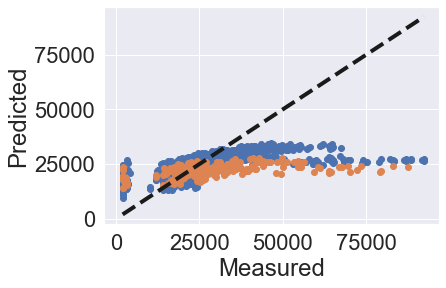

In [235]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

In [236]:
model_results.loc[len(model_results)]=[6,'Linear SVM',grid_search.best_params_,'{:.5f}'.format(grid_search.best_score_),'{:.5f}'.format(test)]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{'n_neighbors': 2},0.938982,0.806483
1,2,Linear Regression,N/A,0.878416,0.861596
2,3,Ridge Regression,{'alpha': 0.01},0.872944,0.8616
3,4,Lasso Regression,{'alpha': 0.001},0.872942,0.8616
4,5,Polynomial Regression,{'degree': 2},0.967854,0.920184
5,6,Linear SVM,"{'C': 100, 'max_iter': 50000}",0.30491,-0.07296


## SVM with RBF Kernel

In [237]:
from sklearn.svm import SVR
svr_kernel = SVR( kernel = "rbf")
svr_kernel.fit(X_train,y_train)

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for gamma in x_range: 
    svr_kernel = SVR(gamma = gamma, kernel = "rbf")
    svr_kernel.fit(X_train,y_train)
    train_score_list.append(svr_kernel.score(X_train,y_train))
    test_score_list.append(svr_kernel.score(X_test, y_test))

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [238]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'gamma': 1}
Best cross-validation score: 0.21


In [239]:
print("Train set score with best parameters: {:.5f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.21434
Test set score with best parameters: -0.07296
best parameters are: {'C': 100, 'gamma': 1}


In [240]:
svr_kernel = SVR(gamma = 1,C = 100 , kernel = "rbf")

#CV
scores = cross_val_score(svr_kernel, X_train, y_train)
print("Cross-validation train_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

scores = cross_val_score(svr_kernel, X_test, y_test)
print("Cross-validation test_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

Cross-validation train_scores: [0.16861311 0.17894912 0.20409079]
Average cross-validation train_scores: 0.18
Cross-validation test_scores: [ 0.03369163  0.01894831 -0.01744456]
Average cross-validation train_scores: 0.01


C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [241]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for gamma in x_range: 
    svr_kernel = SVR(gamma = 1,C = gamma , kernel = "rbf")
    svr_kernel.fit(X_train,y_train)
    train_score_list.append(svr_kernel.score(X_train,y_train))
    test_score_list.append(svr_kernel.score(X_test, y_test))

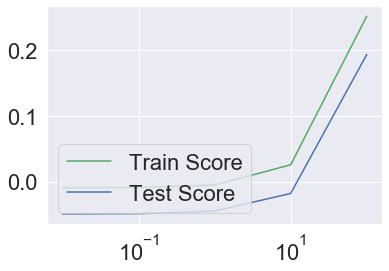

In [242]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)


In [243]:
model_results.loc[len(model_results)]=[7,'SVM with RBF Kernel',grid_search.best_params_,'{:.5f}'.format(grid_search.best_score_),'{:.5f}'.format(test)]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{'n_neighbors': 2},0.938982,0.806483
1,2,Linear Regression,N/A,0.878416,0.861596
2,3,Ridge Regression,{'alpha': 0.01},0.872944,0.8616
3,4,Lasso Regression,{'alpha': 0.001},0.872942,0.8616
4,5,Polynomial Regression,{'degree': 2},0.967854,0.920184
5,6,Linear SVM,"{'C': 100, 'max_iter': 50000}",0.30491,-0.07296
6,7,SVM with RBF Kernel,"{'C': 100, 'gamma': 1}",0.21434,-0.07296


# SVM with Linear Kernel 

In [244]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
kfold =KFold(n_splits=5, random_state=0)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 250, 10, 100], 'max_iter':[60000]}
grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=kfold, return_train_score=True)

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,scoring='r2',cv=kfold).mean()
train=cross_val_score(grid_search,X_train, y_train,scoring='r2',cv=kfold).mean()


In [245]:
print("Train set score with best parameters: {:.5f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.59077
Test set score with best parameters: 0.19325
best parameters are: {'C': 250, 'max_iter': 60000}


In [246]:
model_results.loc[len(model_results)]=[8,'SVM with Linear Kernel',grid_search.best_params_,grid_search.best_score_,test]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{'n_neighbors': 2},0.938982,0.806483
1,2,Linear Regression,N/A,0.878416,0.861596
2,3,Ridge Regression,{'alpha': 0.01},0.872944,0.8616
3,4,Lasso Regression,{'alpha': 0.001},0.872942,0.8616
4,5,Polynomial Regression,{'degree': 2},0.967854,0.920184
5,6,Linear SVM,"{'C': 100, 'max_iter': 50000}",0.30491,-0.07296
6,7,SVM with RBF Kernel,"{'C': 100, 'gamma': 1}",0.21434,-0.07296
7,8,SVM with Linear Kernel,"{'C': 250, 'max_iter': 60000}",0.590774,0.193252


# SVM with Poly Kernel

In [247]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
kfold =KFold(n_splits=5, random_state=0)
param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500],'degree':[1,2,3,4]}
grid_search = GridSearchCV(SVR(kernel='poly'), param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,scoring='r2',cv=kfold).mean();
train=cross_val_score(grid_search,X_train, y_train,scoring='r2',cv=kfold).mean();

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\skle

In [248]:
print("Train set score with best parameters: {:.5f}".format(train))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.19506
Test set score with best parameters: -0.01126
best parameters are: {'C': 500, 'degree': 1}


In [249]:
model_results.loc[len(model_results)]=[9,'SVM with Poly Kernel',grid_search.best_params_,train,test]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Regression,{'n_neighbors': 2},0.938982,0.806483
1,2,Linear Regression,N/A,0.878416,0.861596
2,3,Ridge Regression,{'alpha': 0.01},0.872944,0.8616
3,4,Lasso Regression,{'alpha': 0.001},0.872942,0.8616
4,5,Polynomial Regression,{'degree': 2},0.967854,0.920184
5,6,Linear SVM,"{'C': 100, 'max_iter': 50000}",0.30491,-0.07296
6,7,SVM with RBF Kernel,"{'C': 100, 'gamma': 1}",0.21434,-0.07296
7,8,SVM with Linear Kernel,"{'C': 250, 'max_iter': 60000}",0.590774,0.193252
8,9,SVM with Poly Kernel,"{'C': 500, 'degree': 1}",0.195063,-0.0112606


# Conclusion

From the above table, we chose Polynomial Regression with degree 2 as the best model as it has high train and test scores

Training the data with Polynomial Regression and predicting the unseen test data.

Predicting the MSRP of the Chevrolet car models

In [250]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

model = make_pipeline(PolynomialFeatures(2),Ridge())
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_predict

array([35066.31696736, 35837.1516848 , 21929.50448589, 40827.15308643,
       21728.41529056,  4101.86807328, 24605.95781233, 44196.8041633 ,
       23894.04673504,  3958.60345082, 49741.30946619, 30346.26746718,
       31137.67091905, 31636.57054408, 36405.26537883, 21142.82278072,
       26028.07645575, 24591.27249491,  3246.82485362, 16072.76824748,
       14837.7155018 , 33801.41755892, 25811.07869816, 38927.80817591,
       10748.05535452, 17962.23356295, 24950.02858359, 46625.50123974,
       28210.44210592, 45414.67910515, 17448.29393263, 25824.62779081,
       18697.09175993, 46614.27959836, 24737.04672719, 21788.8663516 ,
       34841.97651605, 24488.25616396,  1935.36143483, 17834.25504938,
       60856.24466786,  1466.89738896, 13426.17960186, 23894.04673504,
       13981.35376614, 35751.46466479, 28785.78308197, 21453.08887256,
       30104.85317396, 63842.2833482 , 16895.75488188, 34638.98965732,
       19379.58021468, 16895.75488188, 67075.71280972, 83690.82138992,
      

Actual MSRP of the Chevrolet car models

In [251]:
y_test

1040    42145
922     39240
395     21920
1016    34290
511     23465
        ...  
474     29310
1027    37195
785     43260
386     19065
418     25210
Name: MSRP, Length: 225, dtype: int64

Plotting Actual MSRP Vs Predicted MSRP using the model

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


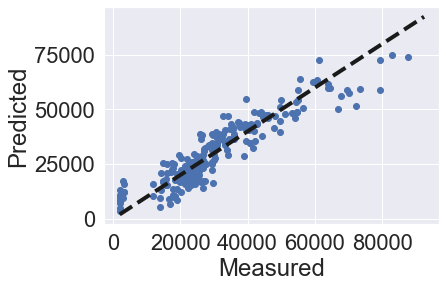

In [252]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
#predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

# Bagging with Linear SVM

In [253]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
lreg = LinearRegression()
bag_rgr = BaggingRegressor(lreg, n_estimators=1000, max_samples=800, bootstrap=True, random_state=0)
bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)
print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))


Train score: 0.88
Test score: 0.86


# Bagging with K Neighbors Regressor

In [254]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
bag_rgr = BaggingRegressor(knn_reg, n_estimators=1000, max_samples=800, bootstrap=True, random_state=0)
bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)

print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.96
Test score: 0.90


# Pasting with linear regressor

In [255]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

lreg = LinearRegression()
bag_rgr = BaggingRegressor(lreg, n_estimators=1000, max_samples=800, bootstrap=False, random_state=0)

bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)

print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.88
Test score: 0.86


# Pasting with K Neighbors Regressor

In [256]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
bag_rgr = BaggingRegressor(knn_reg, n_estimators=1000, max_samples=800, bootstrap=False, random_state=0)
bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)


print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.96
Test score: 0.89


# ADA Boost using K Neighbors Regressor

In [257]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

knn_reg = KNeighborsRegressor()

from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(knn_reg, n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.95
Test score: 0.93


# ADA boost using Ridge

In [258]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

from  sklearn.linear_model import Ridge
ridge = Ridge()

from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(ridge, n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.87
Test score: 0.88


# Gradient boosting on K Neighbour Regressor

In [259]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.970


In [260]:
gbrt = GradientBoostingRegressor(random_state=0, max_depth=3, learning_rate=0.1 , n_estimators=100)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.970


# PCA

In [261]:
X.shape

(1123, 13)

In [262]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)

In [263]:
X_train_reduced.shape

(842, 10)

In [264]:
X_test_reduced = pca.transform(X_test)

# PCA with K Neighbour Regressor

In [265]:
knn_reg.fit(X_train_reduced, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [266]:
print('Train score: ', knn_reg.score(X_train_reduced, y_train))
print('Test score: ', knn_reg.score(X_test_reduced, y_test))

Train score:  0.9601604761511628
Test score:  0.9426597415098794


In [267]:
PCA_results = pd.DataFrame(columns=('S.No','Model_Name','Train_score','Test_Score'))

In [268]:
PCA_results.loc[len(PCA_results)]=[1,'PCA - Knn',knn_reg.score(X_train_reduced, y_train),knn_reg.score(X_test_reduced, y_test)]

In [269]:
PCA_results

,S.No,Model_Name,Train_score,Test_Score
0,1,PCA - Knn,0.96016,0.94266


# PCA with linear regressor

In [270]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)

In [271]:
X_train_reduced.shape

(842, 10)

In [272]:
lreg.fit(X_train_reduced, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [273]:
print('Train score: ', lreg.score(X_train_reduced, y_train))
print('Test score: ', lreg.score(X_test_reduced, y_test))

Train score:  0.8569551774374475
Test score:  0.8560862049471138


In [274]:
PCA_results.loc[len(PCA_results)]=[2,'PCA -Linear regressor',lreg.score(X_train_reduced, y_train),lreg.score(X_test_reduced, y_test)]

In [275]:
PCA_results

,S.No,Model_Name,Train_score,Test_Score
0,1,PCA - Knn,0.960160,0.942660
1,2,PCA -Linear regressor,0.856955,0.856086


# PCA with Polynomial Regression

In [276]:
train_score_list = []
test_score_list = []

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [277]:
print(train_score_list)
print(test_score_list)

[0.877519007323857, 0.9628333607944626, 0.9875053274026538, 0.9877014882910363]
[0.8695172965102818, 0.9519480599814522, -1089123.3033062331, -2743.9807461923288]


In [278]:
print("Train Score",train_score_list[1])
print("Test Score",test_score_list[1])
print("Best Parameters n=",2)

Train Score 0.9628333607944626
Test Score 0.9519480599814522
Best Parameters n= 2


In [279]:
PCA_results.loc[len(PCA_results)]=[3,' PCA - Polynomial Regression',train_score_list[1], test_score_list[1]]
PCA_results

,S.No,Model_Name,Train_score,Test_Score
0,1,PCA - Knn,0.960160,0.942660
1,2,PCA -Linear regressor,0.856955,0.856086
2,3,PCA - Polynomial Regression,0.962833,0.951948


# PCA with ridge

In [280]:
ridge.fit(X_train_reduced, y_train)
   

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [281]:
print('Train score: ', ridge.score(X_train_reduced, y_train))
print('Test score: ', ridge.score(X_test_reduced, y_test))

Train score:  0.856954658899214
Test score:  0.8560953886104675


In [282]:
PCA_results.loc[len(PCA_results)]=[4,'Ridge',ridge.score(X_train_reduced, y_train),ridge.score(X_test_reduced, y_test)]
PCA_results

,S.No,Model_Name,Train_score,Test_Score
0,1,PCA - Knn,0.960160,0.942660
1,2,PCA -Linear regressor,0.856955,0.856086
2,3,PCA - Polynomial Regression,0.962833,0.951948
3,4,Ridge,0.856955,0.856095


# PCA with Lasso

In [283]:
lasso.fit(X_train_reduced, y_train)

Lasso(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [284]:
print('Train score: ', lasso.score(X_train_reduced, y_train))
print('Test score: ', lasso.score(X_test_reduced, y_test))

Train score:  0.8269139563818502
Test score:  0.8265651453584819


In [285]:
PCA_results.loc[len(PCA_results)]=[5,'Lasso',lasso.score(X_train_reduced, y_train),lasso.score(X_test_reduced, y_test)]
PCA_results

,S.No,Model_Name,Train_score,Test_Score
0,1,PCA - Knn,0.960160,0.942660
1,2,PCA -Linear regressor,0.856955,0.856086
2,3,PCA - Polynomial Regression,0.962833,0.951948
3,4,Ridge,0.856955,0.856095
4,5,Lasso,0.826914,0.826565


# PCA with Linear SVM

In [286]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 0.5, 10, 100], 'max_iter':[50000]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv=kfold, return_train_score=True)

grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 0.5, 10, 100],
                         'max_iter': [50000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [287]:
print('Train score: ', grid_search.score(X_train_reduced, y_train))
print('Test score: ', grid_search.score(X_test_reduced, y_test))

Train score:  0.782498203520735
Test score:  0.7799645301519453


In [288]:
PCA_results.loc[len(PCA_results)]=[6,'Linear SVM',grid_search.score(X_train_reduced, y_train),grid_search.score(X_test_reduced, y_test)]

In [289]:
PCA_results

,S.No,Model_Name,Train_score,Test_Score
0,1,PCA - Knn,0.960160,0.942660
1,2,PCA -Linear regressor,0.856955,0.856086
2,3,PCA - Polynomial Regression,0.962833,0.951948
3,4,Ridge,0.856955,0.856095
4,5,Lasso,0.826914,0.826565
5,6,Linear SVM,0.782498,0.779965


# PCA with SVM RBF Kernel

In [290]:
svr_kernel.fit(X_train_reduced,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [291]:
print('Train score: ', svr_kernel.score(X_train_reduced, y_train))
print('Test score: ', svr_kernel.score(X_test_reduced, y_test))

Train score:  0.0765319729107654
Test score:  0.07620828873988494


In [292]:
PCA_results.loc[len(PCA_results)]=[7,'SVM RBF Kernel',svr_kernel.score(X_train_reduced, y_train),svr_kernel.score(X_test_reduced, y_test)]

In [293]:
PCA_results

,S.No,Model_Name,Train_score,Test_Score
0,1,PCA - Knn,0.960160,0.942660
1,2,PCA -Linear regressor,0.856955,0.856086
2,3,PCA - Polynomial Regression,0.962833,0.951948
3,4,Ridge,0.856955,0.856095
4,5,Lasso,0.826914,0.826565
5,6,Linear SVM,0.782498,0.779965
6,7,SVM RBF Kernel,0.076532,0.076208


# PCA with SVM Linear Kernel

In [294]:
svr_kernel_linear = SVR( kernel = "linear")
svr_kernel_linear.fit(X_train_reduced,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [295]:
print('Train score: ', svr_kernel_linear.score(X_train_reduced, y_train))
print('Test score: ', svr_kernel_linear.score(X_test_reduced, y_test))

Train score:  0.12056867586165909
Test score:  0.11860878583693747


In [296]:
PCA_results.loc[len(PCA_results)]=[8,'SVM Linear Kernel',svr_kernel_linear.score(X_train_reduced, y_train),svr_kernel_linear.score(X_test_reduced, y_test)]

In [297]:
PCA_results

,S.No,Model_Name,Train_score,Test_Score
0,1,PCA - Knn,0.960160,0.942660
1,2,PCA -Linear regressor,0.856955,0.856086
2,3,PCA - Polynomial Regression,0.962833,0.951948
3,4,Ridge,0.856955,0.856095
4,5,Lasso,0.826914,0.826565
5,6,Linear SVM,0.782498,0.779965
6,7,SVM RBF Kernel,0.076532,0.076208
7,8,SVM Linear Kernel,0.120569,0.118609


# PCA with SVM Poly Kernel

In [298]:
svr_kernel_poly = SVR( kernel = "poly")
svr_kernel_poly.fit(X_train_reduced,y_train)

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [299]:
print('Train score: ', svr_kernel_poly.score(X_train_reduced, y_train))
print('Test score: ', svr_kernel_poly.score(X_test_reduced, y_test))

Train score:  -0.0031730688846742794
Test score:  0.0006438384420884846


In [300]:
PCA_results.loc[len(PCA_results)]=[9,'SVM Poly Kernel',svr_kernel_poly.score(X_train_reduced, y_train),svr_kernel_poly.score(X_test_reduced, y_test)]

In [301]:
PCA_results

,S.No,Model_Name,Train_score,Test_Score
0,1,PCA - Knn,0.960160,0.942660
1,2,PCA -Linear regressor,0.856955,0.856086
2,3,PCA - Polynomial Regression,0.962833,0.951948
3,4,Ridge,0.856955,0.856095
4,5,Lasso,0.826914,0.826565
5,6,Linear SVM,0.782498,0.779965
6,7,SVM RBF Kernel,0.076532,0.076208
7,8,SVM Linear Kernel,0.120569,0.118609
8,9,SVM Poly Kernel,-0.003173,0.000644


When tabular results of after PCA are compared to before PCA, we found that all the models have been improved in either the train or test score or both.
Especially, we found that the best model from Project 1-Polynomial Regression has improved in its test score a little more after PCA.

# Deep-learning models.

In [302]:
X_train.shape

(842, 13)

In [303]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [304]:
%matplotlib inline
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(0) # for reproducibility

### 1. Perceptron

In [305]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(20, input_dim = 13, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1))

#step 2: make computational graph - compile
model1.compile(loss= 'mean_squared_error' , optimizer = 'adam',metrics = ['mean_squared_error'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 150, batch_size = 300);

Train on 842 samples
Epoch 1/150
842/842 [==============================] - 0s 86us/sample - loss: 1113101285.8527 - mean_squared_error: 1113101312.0000
Epoch 2/150
842/842 [==============================] - 0s 5us/sample - loss: 1113098322.3943 - mean_squared_error: 1113098240.0000
Epoch 3/150
842/842 [==============================] - 0s 5us/sample - loss: 1113095259.5154 - mean_squared_error: 1113095296.0000
Epoch 4/150
842/842 [==============================] - 0s 6us/sample - loss: 1113092244.9786 - mean_squared_error: 1113092352.0000
Epoch 5/150
842/842 [==============================] - 0s 6us/sample - loss: 1113089109.7387 - mean_squared_error: 1113089152.0000
Epoch 6/150
842/842 [==============================] - 0s 5us/sample - loss: 1113085996.6936 - mean_squared_error: 1113085952.0000
Epoch 7/150
842/842 [==============================] - 0s 5us/sample - loss: 1113083072.3040 - mean_squared_error: 1113083136.0000
Epoch 8/150
842/842 [==============================] - 0s 7us

### Perceptron model evaulation metrics:

In [306]:
model1.evaluate(X_test, y_test)

281/281 [==============================] - 0s 103us/sample - loss: 1068904031.6584 - mean_squared_error: 1068904064.0000


[1068904031.658363, 1068904060.0]

### R Squared score for perceptron

In [307]:
train_pred=model1.predict(X_train)
pred=model1.predict(X_test)

In [308]:
from sklearn.metrics import r2_score

print("train",r2_score(y_train, train_pred))
print("test",r2_score(y_test,pred))

train -2.6410569564837623
test -2.8351247849546346


In [309]:
import tensorflow as tf
from tensorflow import keras as ker
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## 2. Multi layer perceptron 

In [310]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(30, input_dim = 13, activation = 'relu'))
#hidden layers
model1.add(Dense(20, activation = 'relu'))
model1.add(Dense(10, activation = 'relu'))
#output layer
model1.add(Dense(1))

#step 2: make computational graph - compile
model1.compile(loss= 'mean_squared_error' , optimizer = 'adam',metrics = ['mean_squared_error'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 100, batch_size = 250);

Train on 842 samples
Epoch 1/100
842/842 [==============================] - 0s 116us/sample - loss: 1113133260.4656 - mean_squared_error: 1113133312.0000
Epoch 2/100
842/842 [==============================] - 0s 7us/sample - loss: 1113128996.0285 - mean_squared_error: 1113128960.0000
Epoch 3/100
842/842 [==============================] - 0s 6us/sample - loss: 1113125792.9881 - mean_squared_error: 1113125760.0000
Epoch 4/100
842/842 [==============================] - 0s 6us/sample - loss: 1113123016.3610 - mean_squared_error: 1113123072.0000
Epoch 5/100
842/842 [==============================] - 0s 7us/sample - loss: 1113120499.9905 - mean_squared_error: 1113120512.0000
Epoch 6/100
842/842 [==============================] - 0s 7us/sample - loss: 1113117809.1021 - mean_squared_error: 1113117824.0000
Epoch 7/100
842/842 [==============================] - 0s 8us/sample - loss: 1113114953.1211 - mean_squared_error: 1113115008.0000
Epoch 8/100
842/842 [==============================] - 0s 6u

### Perceptron model evaulation metrics:

In [311]:
model1.evaluate(X_train, y_train)

842/842 [==============================] - 0s 51us/sample - loss: 990299204.4086 - mean_squared_error: 990299264.0000


[990299204.4085511, 990299260.0]

In [312]:
model1.evaluate(X_test, y_test)

281/281 [==============================] - 0s 78us/sample - loss: 953129668.3274 - mean_squared_error: 953129600.0000


[953129668.3274021, 953129600.0]

### R Squared score for perceptron

In [313]:
train_pred=model1.predict(X_train)
pred=model1.predict(X_test)

In [314]:
from sklearn.metrics import r2_score

print("train",r2_score(y_train, train_pred))
print("test",r2_score(y_test,pred))

train -2.243573440656869
test -2.419737586797142
